Import Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Import DataSet as CSV /other specified format like xlxs

In [3]:
data = pd.read_csv("/content/advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.shape

(200, 4)

In [9]:
missing_values = data.isnull().sum()
missing_values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
# Set seaborn style for better visualizations
sns.set()

In [40]:
# Visualize the distribution of advertising channels
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'TV Advertising Distribution')

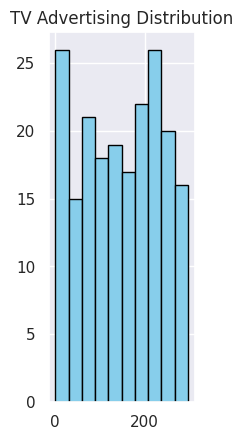

In [41]:
plt.subplot(1, 3, 1)
data['TV'].hist(color='skyblue', edgecolor='black')
plt.title('TV Advertising Distribution')

Text(0.5, 1.0, 'Radio Advertising Distribution')

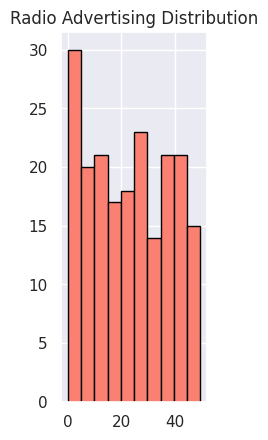

In [42]:
plt.subplot(1, 3, 2)
data['Radio'].hist(color='salmon', edgecolor='black')
plt.title('Radio Advertising Distribution')

Text(0.5, 1.0, 'Newspaper Advertising Distribution')

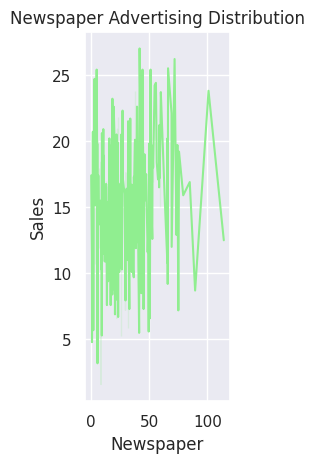

In [26]:
plt.subplot(1, 3, 3)
sns.lineplot(data=data, x='Newspaper', y='Sales', color='lightgreen')
plt.title('Newspaper Advertising Distribution')

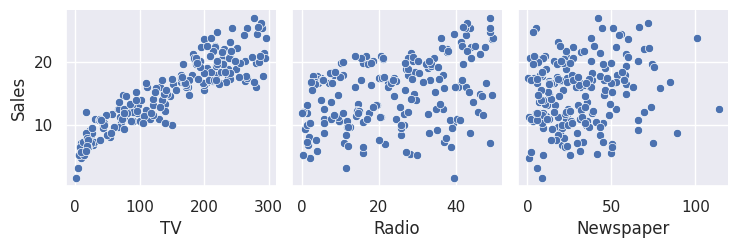

In [38]:
# Explore relationships between advertising channels and sales using pairplot
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')


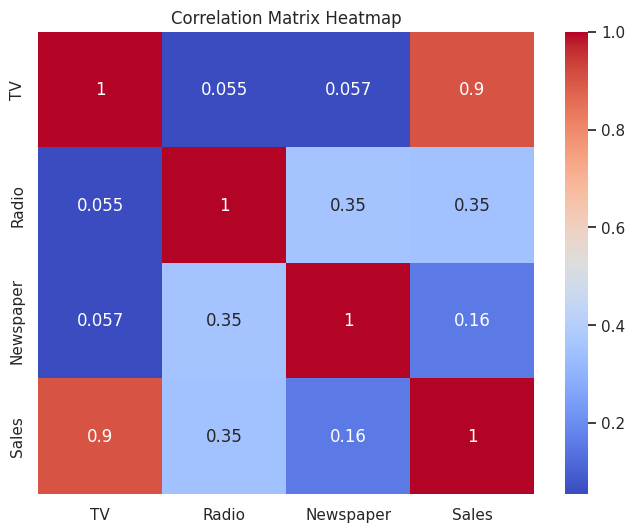

In [39]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [43]:
# Prepare data for model training
X = data.drop(columns='Sales')
Y = data['Sales']

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)


In [54]:
X_train

,TV,Radio,Newspaper
77,120.5,28.5,14.2
73,129.4,5.7,31.3
71,109.8,14.3,31.7
78,5.4,29.9,9.4
42,293.6,27.7,1.8
...,...,...,...
0,230.1,37.8,69.2
184,253.8,21.3,30.0
131,265.2,2.9,43.0
152,197.6,23.3,14.2


In [55]:
X_test

,TV,Radio,Newspaper
40,202.5,22.3,31.6
51,100.4,9.6,3.6
139,184.9,43.9,1.7
197,177.0,9.3,6.4
170,50.0,11.6,18.4
82,75.3,20.3,32.5
183,287.6,43.0,71.8
46,89.7,9.9,35.7
70,199.1,30.6,38.7
100,222.4,4.3,49.8


In [56]:
Y_train

77     14.2
73     11.0
71     12.4
78      5.3
42     20.7
       ... 
0      22.1
184    17.6
131    17.7
152    16.6
106     7.2
Name: Sales, Length: 140, dtype: float64

In [57]:
Y_test

40     16.6
51     10.7
139    20.7
197    14.8
170     8.4
82     11.3
183    26.2
46     10.6
70     18.3
100    16.7
179    17.6
83     13.6
25     17.0
190    10.8
159    12.9
173    16.7
95     16.9
3      16.5
41     17.1
58     23.8
14     19.0
143    10.4
12      9.2
6      11.8
182     8.7
161    13.3
128    24.7
122    16.6
101    23.8
86     12.0
64     16.0
47     23.2
158     7.3
34     11.9
38     10.1
196    14.0
4      17.9
72      8.8
67     13.4
145    10.3
156    15.3
115    12.6
155     3.2
15     22.4
61     24.2
175    27.0
120    15.5
130     1.6
23     20.5
153    16.0
31     11.9
103    19.7
89     16.7
132     5.7
109    19.8
126     6.6
17     24.4
30     21.4
178    16.8
162    19.9
Name: Sales, dtype: float64

In [45]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [46]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [47]:
predictions

array([17.94221632, 11.28731032, 19.36406753, 15.25309499,  8.85035488,
       11.08345095, 24.54827272, 10.72184726, 18.64190205, 17.03877174,
       14.71887065, 13.30204368, 19.10529921, 11.4654086 , 13.82417942,
       14.56139355, 16.86156735, 17.27369971, 17.78634747, 21.28201581,
       19.1397699 , 11.05346066,  9.93276334, 11.49854807,  8.5309559 ,
       13.26073545, 21.75566382, 16.96066432, 24.25791572, 11.92392893,
       16.40376866, 21.96064207,  9.51770237, 10.16209996, 10.08141197,
       10.45644324, 15.54919097,  9.92133897, 13.83425453, 12.54320065,
       14.5093965 , 12.61758414,  6.46804914, 20.25656292, 23.16303373,
       24.65508581, 15.20817964,  9.27513655, 18.72004324, 18.16217728,
       12.73063894, 16.65175796, 15.79776032,  8.36188762, 21.22771856,
        9.52094834, 23.88078008, 23.29062902, 19.6930198 , 16.76467522])

In [48]:
# Display model coefficients and intercept
model_intercept = model.intercept_
model_coefficients = model.coef_

In [51]:
model_intercept

5.022730805826269

In [50]:
model_coefficients

array([ 0.05223455,  0.10672463, -0.00120158])

In [49]:
# Evaluate the model accuracy
model_accuracy = model.score(X_test, Y_test) * 100
print(f"Accuracy of the sales prediction model: {model_accuracy}%")

Accuracy of the sales prediction model: 88.77675297095176%


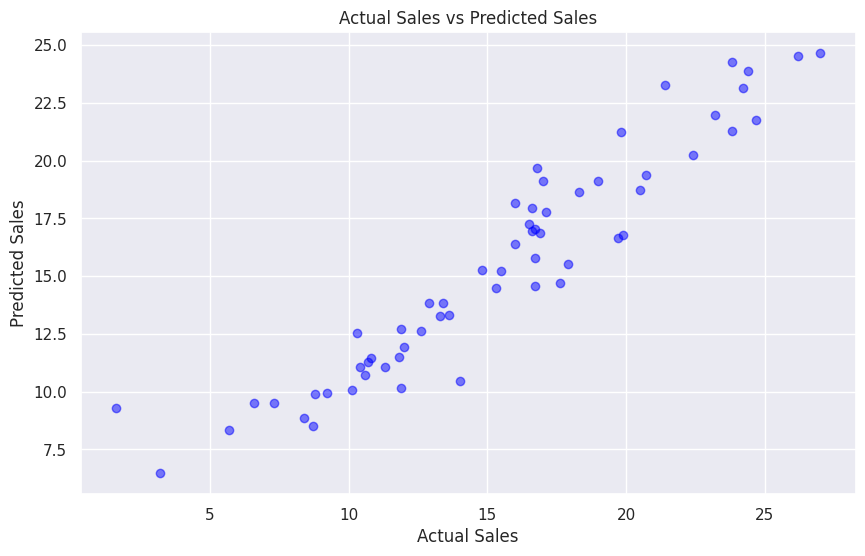

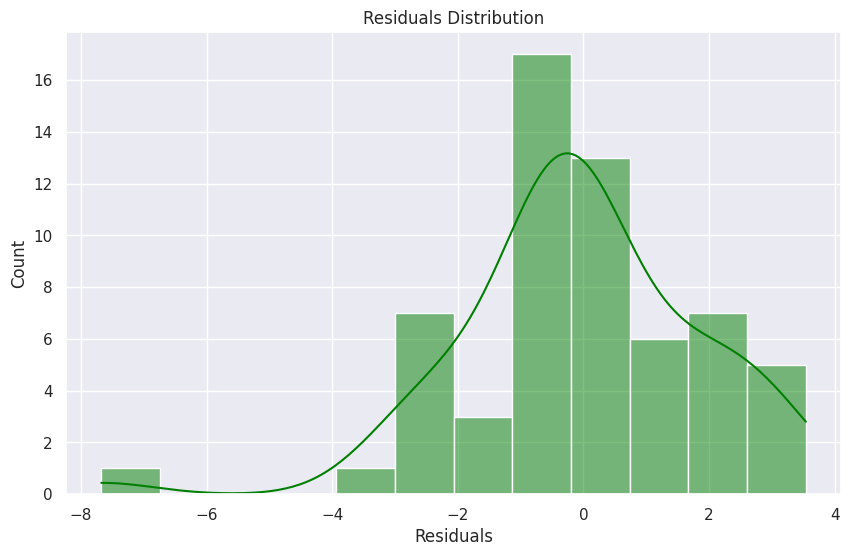

In [59]:
# Visualization of Predictions vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, color='blue', alpha=0.5)
plt.title('Actual Sales vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# Visualization of Residuals
residuals = Y_test - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

In [67]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(Y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     449.1
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           2.43e-70
Time:                        14:53:37   Log-Likelihood:                -258.94
No. Observations:                 140   AIC:                             525.9
Df Residuals:                     136   BIC:                             537.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0227      0.345     14.559      0.0